# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df_enh=pd.read_csv("twitter-archive-enhanced.csv",encoding='utf-8')


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_pred  = pd.read_csv('image_predictions.tsv', sep='\t')
image_pred.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
#my application for a developer account wasn't approved by twitter although I wrote a very similar description to the one suggested.
#Therefore I had to use the csv file
df_twt=[]
with open('tweet-json.txt') as file:
    for line in file:
        tweet=json.loads(line)
        tweet_id=tweet['id']
        retweet_cnt=tweet['retweet_count']
        fav_count=tweet['favorite_count']
        df_twt.append({'tweet_id':tweet_id,
                      'retweet_cnt':retweet_cnt,
                      'fav_count':fav_count})
df_twt=pd.DataFrame(df_twt,columns=['tweet_id','retweet_cnt','fav_count'])
df_twt.info()
               
        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id       2354 non-null int64
retweet_cnt    2354 non-null int64
fav_count      2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
df_enh

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
df_twt

,tweet_id,retweet_cnt,fav_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [8]:
df_enh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
#Check if any dog names are empty
df_enh[df_enh.name==''].name.count()

0

In [10]:
#check for any duplicated tweet_ids
sum(df_enh.tweet_id.duplicated())

0

In [11]:
#rating_numerator
df_enh["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
#check for denominators other than 10
df_enh["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
#check for predictions that are not dogs in all 3 predictions
len(image_pred[(image_pred["p1_dog"]==False)&(image_pred["p2_dog"]==False)&(image_pred["p3_dog"]==False)])



324

In [14]:
#check for any duplicated tweet_ids in df_twt dataset
sum(df_twt.tweet_id.duplicated())

0

In [15]:
#check for any duplicated tweet_ids in df_twt dataset
sum(image_pred.jpg_url.duplicated())

66

### Quality issues

1.Timestamp formats should be datetime instead of strings.

2.tweetid is integer in the datasets instead it should be string

3.Some denominators aren't equal to 10

4.Some dog names are invalid such as 'a', 'an', 'the'

5.The numerator values that are out of [10-14] range is probably inaccurate

6.There are retweet rows in predictions data that we don't need

7.There are rows in predictions data that none of the predictions outcomes are dogs

8.There are duplicate jpg_urls in image predictions data


### Tidiness issues
1.Dog categories can be combined in 1 column instead of 4 different columns

2.3 datasets should be merged into a single table



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [16]:
# Make copies of original pieces of data
df_enh_clean=df_enh.copy()
image_pred_clean=image_pred.copy()
df_twt_clean=df_twt.copy()

### Issue #1

#### Define
Timestamp formats should be datetime instead of strings.

#### Code

In [17]:
df_enh_clean["timestamp"]=pd.to_datetime(df_enh_clean["timestamp"])

#### Test

In [18]:
df_enh_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Issue #2:

#### Define:
tweetid is integer instead of string

#### Code

In [19]:
# change the tweet_id datatype to string in all datasets
list = [df_enh_clean,image_pred_clean,df_twt_clean]
for i in list:
    i.tweet_id = i.tweet_id.astype('object')

#### Test

In [20]:
for i in list:
    assert i.tweet_id.dtypes == 'object'

### Issue #3:

#### Define
Some denominators aren't equal to 10 Since they might be typos, we don't want to include them in our analysis so I will replace them by NaNs 

#### Code

In [21]:


#df_enh_clean['rating_denominator'].mask(df_enh_clean['rating_denominator']!=10, inplace=True)

df_enh_clean.loc[df_enh_clean['rating_denominator']!=10, ['rating_denominator']] = np.nan



#### Test

In [22]:
df_enh_clean[df_enh_clean["rating_denominator"]!=10].rating_denominator.value_counts()


Series([], Name: rating_denominator, dtype: int64)

### Issue #4

#### Define
Some dog names are invalid such as 'a', 'an', 'the'. 



#### Code

In [23]:
namelist=["a","an","the","by",'None']
for i in namelist:
    df_enh_clean["name"].replace(i, np.nan, inplace = True)



#### Test

In [24]:
len(df_enh_clean[df_enh_clean["name"].isin(namelist)])

0

### Issue #5

#### Define
The numerator values that are out of [10-14] range is probably inaccurate. We should exclude them from our dataset 

#### Code

In [25]:
#df_enh_clean['rating_numerator'].mask(((df_enh_clean['rating_numerator']>15)|(df_enh_clean['rating_numerator']<10)), inplace=True)
df_enh_clean.loc[(df_enh_clean['rating_numerator']>15)|(df_enh_clean['rating_numerator']<10), ['rating_numerator']] = np.nan


#### Test

In [26]:
df_enh_clean.rating_numerator.value_counts()

12.0    558
11.0    464
10.0    461
13.0    351
14.0     54
15.0      2
Name: rating_numerator, dtype: int64

### Issue #6

#### Define
There are retweet rows in predictions data that we don't need

#### Code

In [27]:
# Select only the rows where 'retweeted_status_id' is null
df_enh_clean = df_enh_clean[df_enh_clean['retweeted_status_id'].isnull()]

#### Test

In [28]:
#check for all 3 fields indicating the row is a retweet
df_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              1719 non-null float64
rating_denominator            2153 non-null float64
name                          1425 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1)

### Issue #7

#### Define
There are rows in predictions data that none of the predictions outcomes are dogs. We can drop them from the image predictions dataset

#### Code

In [29]:
image_pred_clean=image_pred_clean.drop(image_pred_clean[(image_pred_clean["p1_dog"]==False)&(image_pred_clean["p2_dog"]==False)&(image_pred_clean["p3_dog"]==False)].index)



#### Test

In [30]:
len(image_pred_clean[(image_pred_clean["p1_dog"]==False)&(image_pred_clean["p2_dog"]==False)&(image_pred_clean["p3_dog"]==False)])


0

### Issue #8

#### Define

Some jpg_urls are duplicated. The second ones are generally retweets so I will remove them

#### Code

In [31]:
#Find the duplicated records and keep the first ones as they are the original 
#tweets

image_pred_clean=image_pred_clean.drop(image_pred_clean[image_pred_clean.duplicated(subset='jpg_url')].index)


#### Test

In [32]:
sum(image_pred_clean.jpg_url.duplicated())

0

### Tidyness Issues

### Issue#1

#### Define
Merge 3 datasets into a single dataframe

#### Code

In [33]:
df_enh_clean = pd.merge(df_enh_clean, df_twt_clean,
                on=['tweet_id'], how='left')

In [34]:
df_enh_clean = pd.merge(df_enh_clean, image_pred_clean,
                on=['tweet_id'], how='left')

#### Test

In [35]:
df_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 30 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              1719 non-null float64
rating_denominator            2153 non-null float64
name                          1425 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
retweet_cnt              

### Issue #2

#### Define

Dog stage categories can be combined in 1 column instead of 4 different columns

In [36]:
df_enh_clean['stage'] = df_enh_clean.doggo + df_enh_clean.floofer + df_enh_clean.pupper + df_enh_clean.puppo
df_enh_clean['stage'] = df_enh_clean['stage'].map(lambda x: x.replace("None",""))


#### Test

In [37]:
df_enh_clean[["doggo","floofer","pupper","puppo","stage"]]

,doggo,floofer,pupper,puppo,stage
0,None,None,None,None,
1,None,None,None,None,
2,None,None,None,None,
3,None,None,None,None,
4,None,None,None,None,
5,None,None,None,None,
6,None,None,None,None,
7,None,None,None,None,
8,None,None,None,None,
9,doggo,None,None,None,doggo


In [38]:
#drop the 4 columns that are now combined in a single column
df_enh_clean.drop(columns=["doggo","floofer","pupper","puppo"],inplace=True)

In [39]:
#Check if the columns are dropped
df_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 27 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              1719 non-null float64
rating_denominator            2153 non-null float64
name                          1425 non-null object
retweet_cnt                   2175 non-null int64
fav_count                     2175 non-null int64
jpg_url                       1686 non-null object
img_num                       1686 non-null float64
p1                        

In [39]:
#check the values in the merged column
df_enh_clean.groupby("stage").stage.count()



stage
                1831
doggo             75
doggofloofer       1
doggopupper       10
doggopuppo         1
floofer            9
pupper           224
puppo             24
Name: stage, dtype: int64

In [41]:
#format the rows where there are multiple dog stages
df_enh_clean.loc[df_enh_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_enh_clean.loc[df_enh_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'
df_enh_clean.loc[df_enh_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_enh_clean.groupby("stage").stage.count()

stage
                  1831
doggo               75
doggo, floofer       1
doggo, pupper       10
doggo, puppo         1
floofer              9
pupper             224
puppo               24
Name: stage, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [40]:
df_enh_clean.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [41]:
df_enh_clean[["tweet_id","timestamp","retweet_cnt","fav_count","rating_numerator","stage","p1"]].head(2)

,tweet_id,timestamp,retweet_cnt,fav_count,rating_numerator,stage,p1
0,892420643555336193,2017-08-01 16:23:56,8853,39467,13.0,,NaN
1,892177421306343426,2017-08-01 00:17:27,6514,33819,13.0,,Chihuahua


In [42]:
#Find the avg favorite counts by dog stage
df_stage=df_enh_clean[(df_enh_clean["stage"]=='floofer')|(df_enh_clean["stage"]=='puppo')|(df_enh_clean["stage"]=='doggo')|(df_enh_clean["stage"]=='pupper')]
stage_fav=df_stage.groupby("stage").fav_count.mean().sort_values()
stage_fav


stage
pupper      7176.267857
floofer    11064.444444
doggo      17369.093333
puppo      20788.875000
Name: fav_count, dtype: float64

In [60]:
df_enh_clean.groupby("p1").p1.count().sort_values(ascending=False).head(5)

p1
golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
Name: p1, dtype: int64

In [65]:
df_breed=df_enh_clean[(df_enh_clean["p1_dog"]==True)]
df_breed.groupby("p1").fav_count.mean().sort_values(ascending=False).head(10)

p1
Saluki                     24060.000000
French_bulldog             17913.000000
Afghan_hound               17326.666667
black-and-tan_coonhound    17012.000000
flat-coated_retriever      16791.625000
Irish_water_spaniel        16400.000000
standard_poodle            15786.000000
English_springer           15657.222222
Cardigan                   15311.000000
Leonberg                   14934.333333
Name: fav_count, dtype: float64

In [57]:
df_enh_clean["retweet_cnt"].describe(percentiles=[.01, .10, .25, .50, .90])

count     2175.000000
mean      2757.987126
std       4646.599662
min          0.000000
1%          36.220000
10%        252.400000
25%        608.000000
50%       1341.000000
90%       6292.200000
max      79515.000000
Name: retweet_cnt, dtype: float64

### Insights:
1.Puppo dogs has the biggest average of favorite counts

2.Golden Retriever has the most tweets but Saluki dogs have the highest mean of favorites.

3.Almost every tweet has retweets with an avegarge of 1341 retweets

### Visualization

In [44]:
df_enh_clean['date'] = df_enh_clean['timestamp'].dt.date

<function matplotlib.pyplot.show(*args, **kw)>

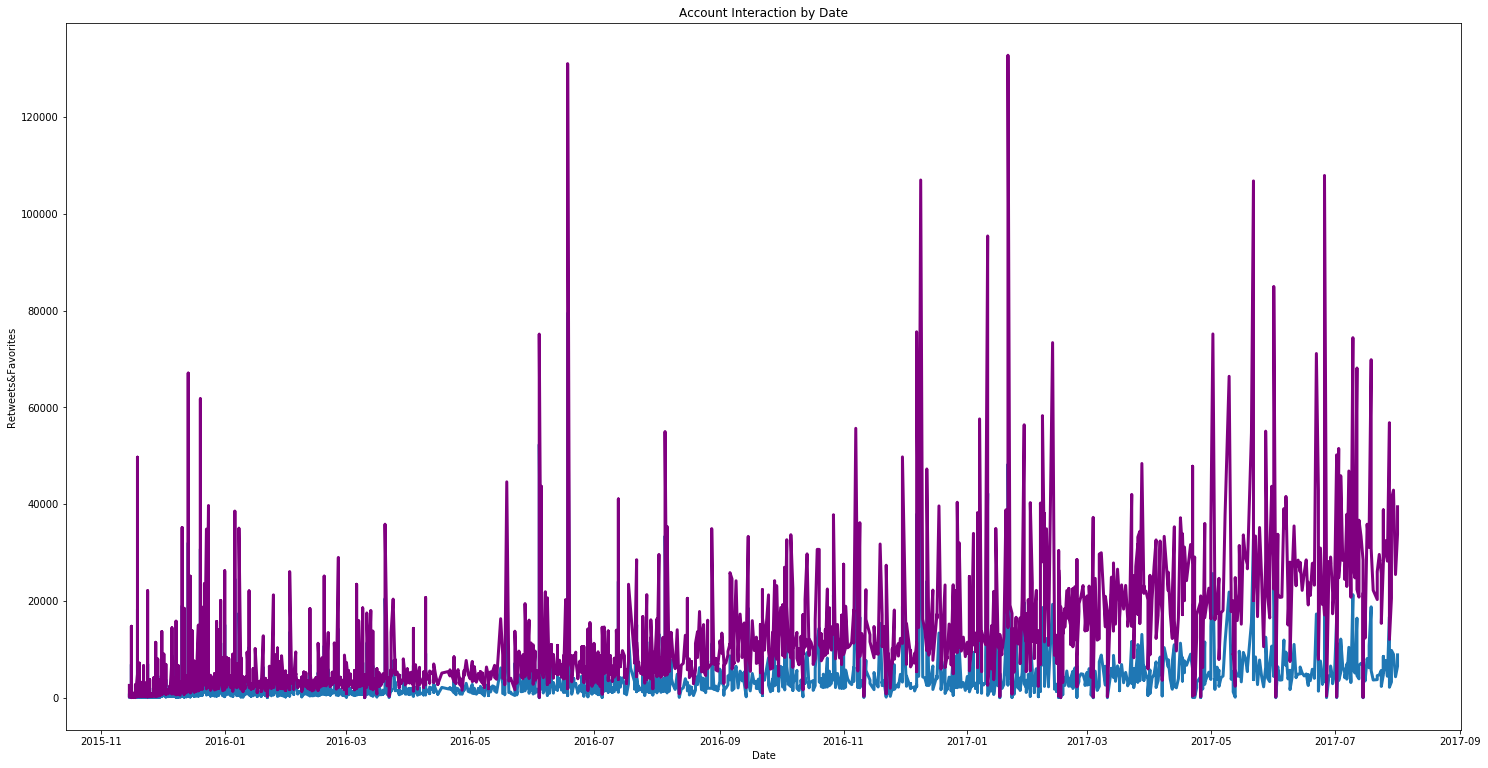

In [45]:
#Show the trend of retweet and favorite counts in time
plt.rcParams["figure.figsize"] = (25,13)
plt.plot(df_enh_clean.date, df_enh_clean.retweet_cnt, label='Retweets', 
         linewidth=3)
plt.plot(df_enh_clean.date, df_enh_clean.fav_count, color='purple', 
         label='Favorites', linewidth=3)
plt.title('Account Interaction by Date')
plt.xlabel('Date')
plt.ylabel('Retweets&Favorites')
plt.show

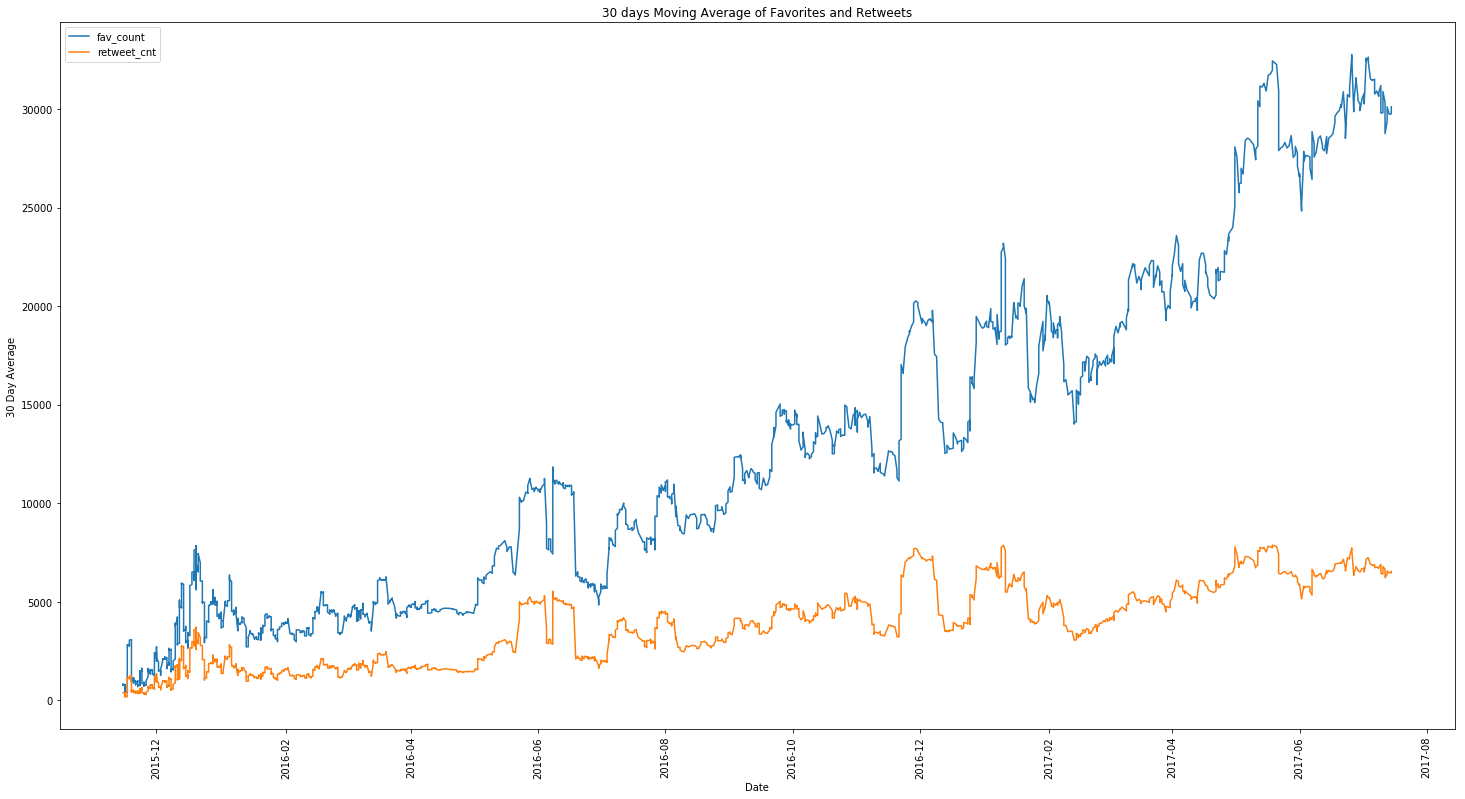

In [46]:
# since there are a lot of spikes in the dily view we can convert it to a moving average 
m_f= df_enh_clean.fav_count.rolling(window = 30).mean()
m_r= df_enh_clean.retweet_cnt.rolling(window = 30).mean()
x = df_enh_clean.date
plt.plot(x,m_f)
plt.plot(x,m_r)
plt.xticks(rotation = 90)
plt.title('30 days Moving Average of Favorites and Retweets')
plt.xlabel('Date')
plt.ylabel('30 Day Average')
plt.legend(loc=0);

Number of favorites has been increasing over time  even though retweet counts has a more stable trend

([<matplotlib.axis.XTick at 0x7f47b078ada0>,
 <a list of 7 Text xticklabel objects>)

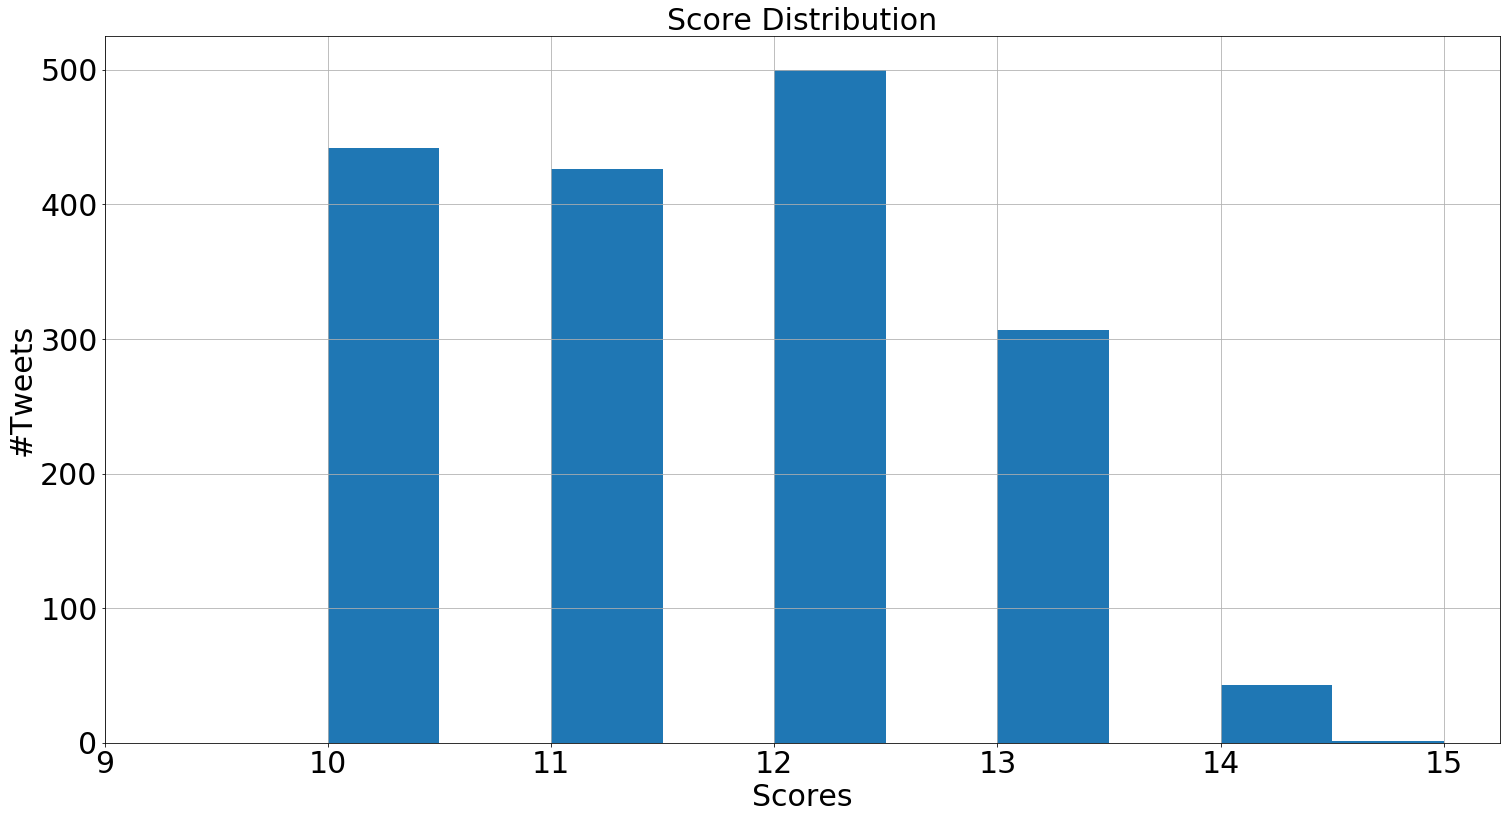

In [48]:
# distribution of scores
df_enh_clean.rating_numerator.hist(xlabelsize=30,ylabelsize=30)
plt.title('Score Distribution',fontsize=30)
plt.xlabel('Scores',fontsize=30)
plt.ylabel('#Tweets',fontsize=30)
plt.xticks(np.arange(9,16))


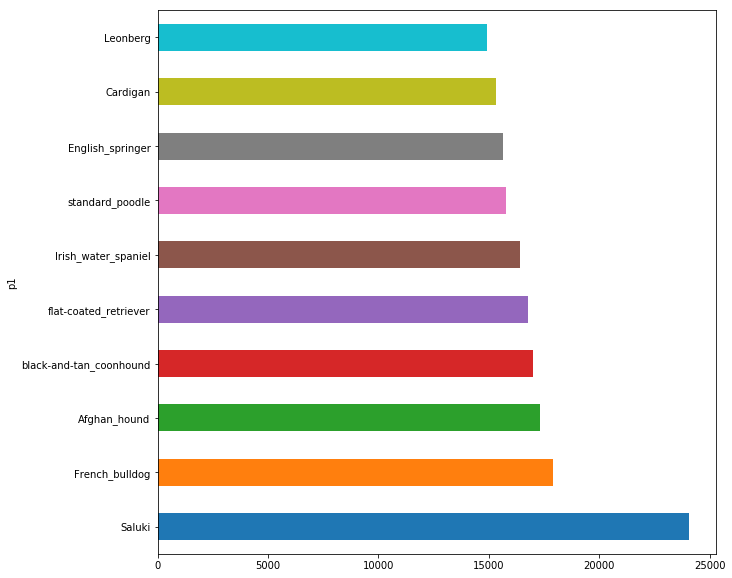

In [74]:
df_breed.groupby("p1").fav_count.mean().sort_values(ascending=False)[:10].plot(figsize=(10,10),kind='barh')
